<a href="https://colab.research.google.com/github/Narmeen07/knapsack/blob/main/knpsack_algorithms_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEVOIR 1 - ÉTUDE EMPIRIQUE DU PROBLÈME DU SAC À DOS**

**1. Information sur le groupe et le rapport**

Numéro du Groupe: \\
Nom des membres du groupe: Narmeen Fatimah Oozeer \\
Numéros d'étudiants des membres du groupe : 300248361 \\

**2. Problème du Sac à dos (Knapsack)**

**In Mathematical terms, the Knapsack problem can be termed as follows:**

Given:

A set of items, indexed from 1 to n.
Each item i has a weight w_i and a price p_i.
The knapsack has a maximum weight capacity W.

Find:

A subset of items to include in the knapsack, denoted by a binary vector x, where x_i = 1 if item i is included and x_i = 0 if it is not.

Objective:

Maximize the total price (profit) subject to the constraint that the total weight of the selected items does not exceed the knapsack's capacity: ∑(x_i * w_i) ≤ W.

**3. Ensemble de données**

Here is a description of the dataset, the dataset is download from kaggle:[link text](https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download)

It is loaded on colab from my github:[link text](https://raw.githubusercontent.com/Narmeen07/knapsack/master/Downloads/knapsack_5_items_updated.csv)

Each row of the dataset represents an instance of the knapsack problem and each data has the following columns:

**Weights:** This column represents the weights of individual items. Each row corresponds to a different set of items. For example, in the first row, you have five items with weights [46, 40, 42, 38, 10].

**Prices:** This column represents the prices (or values, profits, or benefits) associated with each item. In the first row, you have the prices [12, 19, 19, 15, 8] corresponding to the weights in the same row.

**Capacity:** This column represents the maximum weight capacity of the knapsack. It indicates the maximum total weight that the knapsack can hold. For example, in the first row, the knapsack has a capacity of 40.

**Best picks: **This column appears to represent the solution to the knapsack problem for each row. It's a binary vector where 1 indicates that the corresponding item is selected to be put in the knapsack, and 0 indicates that the item is not selected. For instance, in the first row, the best picks are [0. 1. 0. 0. 0.], which means the second item with a weight of 40 has been selected (indicated by the 1).

**Best price:** This column represents the total price (or profit) achieved by selecting the items specified in the "Best picks" column. In the first row, the best price achieved is 19.  

**Faire l'importation des bibliothèques importantes**

In [1]:
import pandas as pd
import itertools
import numpy as np
import math
import random

**Lire l'ensemble de données**

Comme indiqué dans la description du projet, les correcteurs devraient pouvoir exécuter votre notebook sans nécessiter de téléchargement.

Pour permettre l'accès à l'ensemble de données dans votre notebook, vous pouvez le mettre sur un répertoire GitHub public et fournir un lien vers la version originale de l'ensemble de données.

Votre lien vers l'ensemble de données devrait être comme suit:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

Par exemple:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Maintenant, dans votre code, mettez le lien vers VOTRE dataset et lisez-le avec pandas:

In [2]:
url ="https://raw.githubusercontent.com/Narmeen07/knapsack/master/Downloads/knapsack_5_items_updated.csv"

dataset = pd.read_csv(url)


Regardons quelles sont les colonnes du dataset :

In [3]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

Comme nous nous y attendions, nous avons des colonnes pour les poids, les coûts, la capacité, les meilleurs choix et le meilleur prix pour toutes les instances.

Regardons les 10 premières entrées (rangées):

In [4]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45


**Étape de pré-traitenemtn**

Règle générale, la première étape de tout projet impliquant la lecture et la manipulation de données est le prétraitement et le nettoyage des données.

Dans notre ensemble de données, nous nous attendons à ce que les entrées des colonnes « Weights », « Prices » et « Best Picks » se présentent sous la forme de tableaux de nombres réels ou d'entiers, comme ceci : [45, 40, 42, 38, 10]

Cependant, lorsque vous lisez les entrées à l'aide de pandas, elles se présentent sous la forme de chaînes (String): "[45 40 42 38 10]"

Nous devons donc convertir ces chaînes en « tableaux de réels ou d’entiers ». Vous pouvez utiliser la fonction fournie ci-dessous à cet effet :


In [5]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list



De plus, il est possible que certaines lignes de l'ensemble de données contiennent des valeurs vides dans des colonnes spécifiques. Nous voulons également éliminer ces lignes car elles ne fournissent aucune information utile. Nous utilisons la fonction dropna() pour ce faire :

In [6]:
#Ignore the warning messages.

dataset = dataset.dropna()
#apply the string_to_list function to the Weights column
dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))


Il est maintenant temps de mettre en œuvre les algorithmes de recherche. Pour chaque algorithme, un modèle vous est fourni. Vous pouvez modifier ce modèle si vous voulez, mais regardez d'abord tous les paramètres utilisés car ils sont tous importants. Vous pouvez également définir autant de fonctions auxiliaires que vous le souhaitez.

**4. Generate and Test**

Donnez une description...  Aussi, assurez-vous de mettre des commentaires en utilisant vos propres mots dans le code pour montrer que vous comprenez le code que vous soumettez.

In [7]:
def gen_and_test(data):

 max_capacity = data['Capacity']
 #generate all possible combinations of the weights of the row as binary strings of 0's and 1's
 combinations = list(itertools.product([0, 1], repeat=len(data.Weights)))
 #compute the total weight for each combination
 total_weight = np.dot(combinations, data.Weights)
  #calculate the total price for each combination of weights
 total_price = np.dot(combinations, data.Prices)
  #create a dataframe with the combinations, total weight and total price
 updated_data = pd.DataFrame({'Combination':combinations, 'Total weight':total_weight, 'Total price':total_price})
 #remove all combinations that exceed the maximum capacity
 updated_data = updated_data[updated_data['Total weight'] <= max_capacity]
 #return both the combination that has the best price and the best price
 #the combination that has the hightest price
 best_combination = updated_data[updated_data['Total price'] == updated_data['Total price'].max()]

 return best_combination['Total price'].values[0],best_combination['Combination'].values[0]



In [8]:
print(dataset.iloc[2])
print(gen_and_test(dataset.iloc[2]))

Weights       [32.0, 49.0, 27.0, 37.0, 24.0]
Prices          [19.0, 16.0, 16.0, 4.0, 1.0]
Capacity                                  87
Best picks         [1.0, 0.0, 1.0, 0.0, 1.0]
Best price                                36
Name: 2, dtype: object
(36.0, (1, 0, 1, 0, 1))


In [9]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [10]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Votre analyse:**
The problem is tractable that is we can generate all 2^5 solutions for each instance of the problem and search for the best solution and we can see that our best solution matches the best pick in the kaggle  dataset and we get an accuracy of 100%

------------------------------------------------------------------------------------------------

**5. Recherche gloutonne (greedy search)**

Donnez une description...  Aussi, assurez-vous de mettre des commentaires en utilisant vos propres mots dans le code pour montrer que vous comprenez le code que vous soumettez.

In [78]:
def greedy(data):
    weights = data.Weights
    prices = data.Prices
    knapsack_capacity = data.Capacity

    # Create a list of items as tuples (weight, price, index)
    items = [(weights[i], prices[i], i) for i in range(len(weights))]

    # Sort the items by value-to-weight ratio in descending order
    items.sort(key=lambda x: x[1] / x[0], reverse=True)

    current_weight = 0
    current_value = 0
    best_value = 0
    best_picks = [0] * len(items)
    # Iterate through the sorted items
    for item in items:
        weight, price, index = item
        # Check if adding the item to the knapsack would exceed its capacity
        if current_weight + weight <= knapsack_capacity:
            current_weight += weight
            current_value += price
            best_picks[index] = 1   # Mark the item as selected (1)
        # Update the best value if the current state is better
        if current_value > best_value:
            best_value = current_value

    return best_value, best_picks



In [79]:
#take a row 2 of the dataset and see the output of the greedy search on that data item
print(dataset.iloc[2])
greedy(dataset.iloc[2])

Weights       [32.0, 49.0, 27.0, 37.0, 24.0]
Prices          [19.0, 16.0, 16.0, 4.0, 1.0]
Capacity                                  87
Best picks         [1.0, 0.0, 1.0, 0.0, 1.0]
Best price                                36
Name: 2, dtype: object


(36.0, [1, 0, 1, 0, 1])

In [80]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [81]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Votre analyse:**

The greedy algorithm achieves an 83% accuracy rate, showcasing its efficiency in quickly solving large knapsack problems. However, its preference for locally optimal choices results in a 17% error rate, making it fall short of guaranteeing the optimal solution, it is not an exhaustive search of all 2^5 solutions and instead we decrease our search space by listing items in their decreasing price/weight ratio.

------------------------------------------------------------------------------------------------

**6. Recuit Simulé (Simulated Annealing)**

Donnez une description...  Aussi, assurez-vous de mettre des commentaires en utilisant vos propres mots dans le code pour montrer que vous comprenez le code que vous soumettez.


In [15]:
def generate_initial_solution(data):
    weights = data.Weights
    prices = data.Prices
    knapsack_capacity = data.Capacity

    # Create a list of items as tuples (weight, price, index)
    items = [(weights[i], prices[i], i) for i in range(len(weights))]

    # Sort the items by value-to-weight ratio in descending order
    items.sort(key=lambda x: x[1] / x[0], reverse=True)

    current_weight = 0
    current_solution = [0] * len(items)

    for item in items:
        weight, _, index = item
        if current_weight + weight <= knapsack_capacity:
            current_solution[index] = 1
            current_weight += weight
        else:
            break

    return current_solution

In [16]:
def simulated_annealing(data, N, initial_temperature, cooling_rate):
    weights = data.Weights
    prices = data.Prices
    knapsack_capacity = data.Capacity

    #start current_solution with a matrix of 0's that is with an empty knapsack
    current_solution = [0] * len(weights)
    #current_solution = generate_initial_solution(data)
    current_weight = 0
    current_value = 0
    best_solution = current_solution
    best_value = current_value

    current_temperature = initial_temperature

    for _ in range(N):
        # Generate a neighboring solution
        neighbor_solution = current_solution.copy()
        index = random.randint(0, len(weights) - 1)
        if neighbor_solution[index] == 0:
            if current_weight + weights[index] <= knapsack_capacity:
                neighbor_solution[index] = 1
                current_weight += weights[index]
                current_value += prices[index]
        else:
            neighbor_solution[index] = 0
            current_weight -= weights[index]
            current_value -= prices[index]

        # Calculate the change in objective function value
        delta = current_value - best_value

        # If the neighbor is better or accepted probabilistically
        if delta > 0 or random.random() < math.exp(delta / current_temperature):
            current_solution = neighbor_solution
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

        # Reduce the temperature
        current_temperature *= cooling_rate

    return best_value, best_solution


In [17]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [18]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.22876809393663325


**Votre analyse:**

------------------------------------------------------------------------------------------------

**7. Algorithme génétique**

Donnez une description...  Aussi, assurez-vous de mettre des commentaires en utilisant vos propres mots dans le code pour montrer que vous comprenez le code que vous soumettez.

In [68]:
import random
import numpy as np

def generate_solution(data):
    # Return a random solution of weights
    #return random.choices([0, 1], k=len(data.Weights))
    _,solution = greedy(data)
    return solution

def calculate_fitness(ind, prices, weights, capacity):
    # Calculate the total value given a given solution
    total_value = np.dot(ind, prices)
    # Calculate the total weight given a given solution
    total_weight = np.dot(ind, weights)
    # If the total weight exceeds the capacity, return 0, otherwise return the total value
    if total_weight > capacity:
        return 0
    else:
        return total_value

def crossover(parent1, parent2, cross_rate):
    # Define a crossover point
    crossover_point = random.randint(0, len(parent1) - 1)
    # Create two children
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(child, mut_rate):
    # Get a copy of the child to mutate
    child_mut = child.copy()

    # Iterate through each element of the child
    for i in range(len(child_mut)):
        # If the random number is less than the mutation rate
        if random.random() < mut_rate:
            # Flip the bit
            child_mut[i] = 1 - child_mut[i]

    return child_mut

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    # Generate a population of solutions
    population = [generate_solution(data) for _ in range(population_size)]

    for generation in range(num_generations):
        fitness_values = [calculate_fitness(ind, data.Prices, data.Weights, data.Capacity) for ind in population]
        selected_parents = []
        total_fitness = sum(fitness_values)

        for _ in range(population_size // 4):
            roulette_wheel = random.uniform(0, total_fitness)
            partial_sum = 0

            for i in range(population_size):
                partial_sum += fitness_values[i]

                if partial_sum >= roulette_wheel:
                    selected_parents.append(population[i])
                    break
        new_population = []

        while len(new_population) < population_size:
            parent1, parent2 = random.choices(selected_parents, k=2)
            if random.random() < cross_rate:
                child1, child2 = crossover(parent1, parent2, cross_rate)
            else:
                child1, child2 = parent1.copy(), parent2.copy()
            if random.random() < mut_rate:
                child1 = mutation(child1, mut_rate)
            if random.random() < mut_rate:
                child2 = mutation(child2, mut_rate)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = max(population, key=lambda x: calculate_fitness(x, data.Prices, data.Weights, data.Capacity))

    return calculate_fitness(best_solution, data.Prices, data.Weights, data.Capacity), best_solution


In [70]:
#generating a test dataset to test the accuracy, this is because the method is expensive to run on 10 000 items
test_dataset_size = 1000
shuffled_dataset = dataset.sample(frac=1, random_state=42)
test_dataset = shuffled_dataset.head(test_dataset_size)

solutions_ga = []
#test the accuracy of the method in the test_dataset
#i below is a counter that counts how many rows in the dataset have been looped yet
i= 0
for _, row in test_dataset.iterrows():
    target = row['Best price']
    i= i+ 1
    print(i)
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [67]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.831


**Votre analyse:**

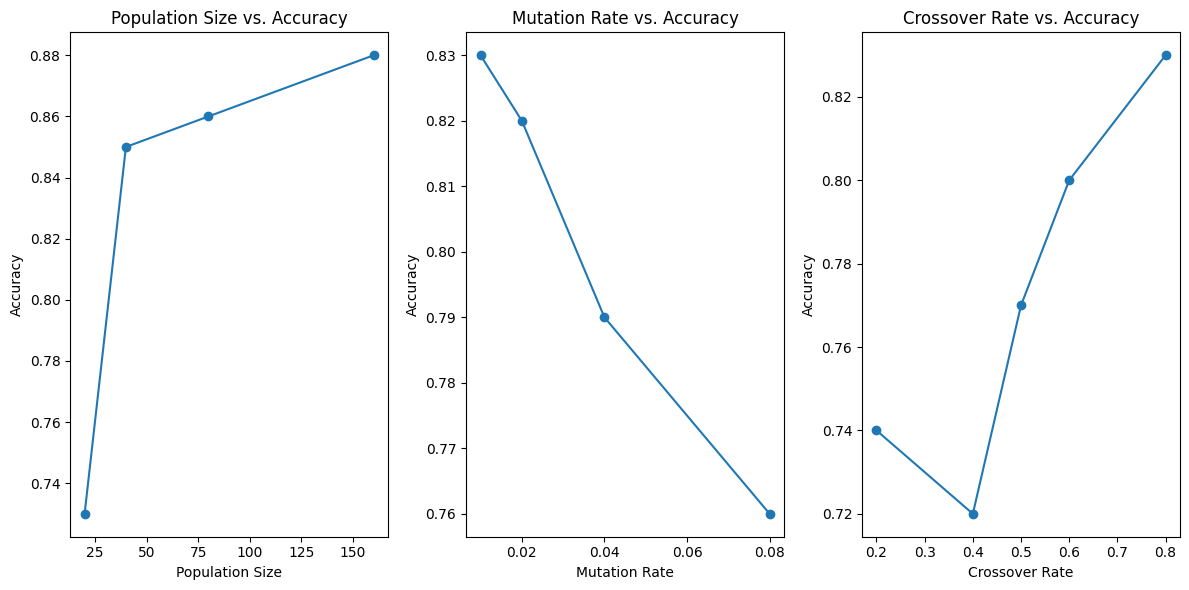

In [76]:
#generate a smaller test dataset to create the plots so that it is not that expensive to run
test_dataset_size = 100
shuffled_dataset = dataset.sample(frac=1, random_state=42)
test_dataset = shuffled_dataset.head(test_dataset_size)
import matplotlib.pyplot as plt

# Define the ranges of parameter values to test
population_sizes = [20, 40, 80, 160]
mutation_rates = [0.01, 0.02, 0.04, 0.08]
crossover_rates = [0.2, 0.4,0.5, 0.6, 0.8]
num_generations = [10,20,40,80]

# Initialize lists to store accuracies for each parameter
population_accuracies = []
mutation_accuracies = []
crossover_accuracies = []
num_generations_accuracies =[]

# Iterate through different population sizes
for pop_size in population_sizes:
    # Run your genetic algorithm with the current population size
    comparative_solutions = []
    for _, row in test_dataset.iterrows():
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size=pop_size, num_generations=50, mut_rate=0.1, cross_rate=0.7, tournament_size=5)
        comparative_solutions.append(1 if target == solution else 0)

    # Calculate accuracy for the current population size and store it
    accuracy = sum(comparative_solutions) / len(comparative_solutions)
    population_accuracies.append(accuracy)

# Iterate through different mutation rates
for mut_rate in mutation_rates:
    # Run your genetic algorithm with the current mutation rate
    comparative_solutions = []
    for _, row in test_dataset.iterrows():
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size=20, num_generations=50, mut_rate=mut_rate, cross_rate=0.7, tournament_size=5)
        comparative_solutions.append(1 if target == solution else 0)

    # Calculate accuracy for the current mutation rate and store it
    accuracy = sum(comparative_solutions) / len(comparative_solutions)
    mutation_accuracies.append(accuracy)

# Iterate through different crossover rates
for cross_rate in crossover_rates:
    # Run your genetic algorithm with the current crossover rate
    comparative_solutions = []
    for _, row in test_dataset.iterrows():
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size=20, num_generations=50, mut_rate=0.1, cross_rate=0.7, tournament_size=5)
        comparative_solutions.append(1 if target == solution else 0)

    # Calculate accuracy for the current crossover rate and store it
    accuracy = sum(comparative_solutions) / len(comparative_solutions)
    crossover_accuracies.append(accuracy)

for num_generation in num_generations:
    # Run your genetic algorithm with the current crossover rate
    comparative_solutions = []
    for _, row in test_dataset.iterrows():
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size=20, num_generations=num_generation, mut_rate=0.1, cross_rate=cross_rate, tournament_size=5)
        comparative_solutions.append(1 if target == solution else 0)

    # Calculate accuracy for the current crossover rate and store it
    accuracy = sum(comparative_solutions) / len(comparative_solutions)
    num_generations_accuracies.append(accuracy)

# Create plots to compare accuracy with parameter sizes
plt.figure(figsize=(12, 6))

# Population Size vs. Accuracy
plt.subplot(131)
plt.plot(population_sizes, population_accuracies, marker='o')
plt.title('Population Size vs. Accuracy')
plt.xlabel('Population Size')
plt.ylabel('Accuracy')

# Mutation Rate vs. Accuracy
plt.subplot(132)
plt.plot(mutation_rates, mutation_accuracies, marker='o')
plt.title('Mutation Rate vs. Accuracy')
plt.xlabel('Mutation Rate')
plt.ylabel('Accuracy')

# Crossover Rate vs. Accuracy
plt.subplot(133)
plt.plot(crossover_rates, crossover_accuracies, marker='o')
plt.title('Crossover Rate vs. Accuracy')
plt.xlabel('Crossover Rate')
plt.ylabel('Accuracy')


plt.tight_layout()
plt.show()





Text(0, 0.5, 'Accuracy')

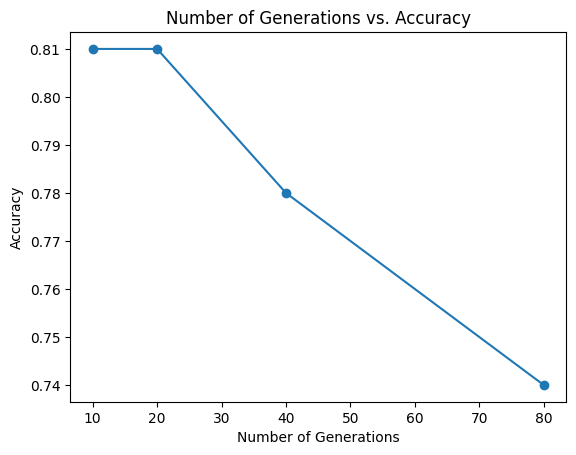

In [77]:
plt.plot(num_generations, num_generations_accuracies, marker='o')
plt.title('Number of Generations vs. Accuracy')
plt.xlabel('Number of Generations')
plt.ylabel('Accuracy')

**8. Étude comparative**

description  +  tableaux/figures

--------------------------------------------------------------------------


**9. Conclusion**

Commentez sur l'étude empirique, ses résultats et donnez des idées pour des travaux futurs.

--------------------------------------------------------------------------


**10. Références**

Assurez-vous de donner des références vers TOUTES les sources utilisées (articles, code, algorithmes).

**Hint:**

Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *General access* , remplacez *Restricted* par « Anyone with the link ».